In [1]:
#importing the required packages
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the given csv data
data = pd.read_csv(r'C:\Users\Dell\Downloads\cardio_data1.csv')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,Male,168.0,62.0,110,80,normal,normal,no,no,yes,no
1,1,20228,Female,156.0,85.0,140,90,well above normal,normal,no,no,yes,yes
2,2,18857,Female,165.0,64.0,130,70,well above normal,normal,no,no,no,yes
3,3,17623,Male,169.0,82.0,150,100,normal,normal,no,no,yes,yes
4,4,17474,Female,156.0,56.0,100,60,normal,normal,no,no,no,no


In [3]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [4]:
#finding the number of columns and rows
data.shape

(70000, 13)

In [5]:
#Statistical summary
data.describe()

,id,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,69941.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,164.358116,74.205690,128.817286,96.630414
std,28851.302323,2467.251667,8.210681,14.395757,154.011419,188.472530
min,0.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,25006.750000,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,50001.500000,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,74889.250000,21327.000000,170.000000,82.000000,140.000000,90.000000
max,99999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000


In [6]:
#finding the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       69992 non-null  object 
 3   height       69941 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  69985 non-null  object 
 8   gluc         70000 non-null  object 
 9   smoke        70000 non-null  object 
 10  alco         69987 non-null  object 
 11  active       70000 non-null  object 
 12  cardio       70000 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 6.9+ MB


# Exploratory Data Analysis

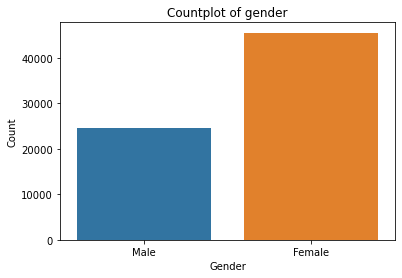

In [7]:
sns.countplot(x=data["gender"])
plt.title("Countplot of gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In this dataset number of females is higher than males.

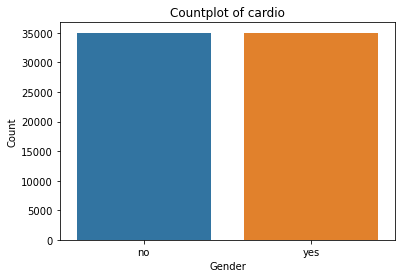

In [8]:
sns.countplot(x=data["cardio"])
plt.title("Countplot of cardio")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

The number of people with cardiovascular and without cardiovascular are almost similar

In [9]:
data["cardio"].value_counts(normalize=True)

no     0.5003
yes    0.4997
Name: cardio, dtype: float64

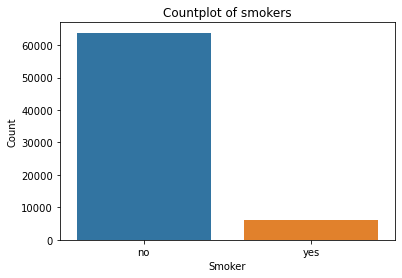

In [10]:
sns.countplot(x=data["smoke"])
plt.title("Countplot of smokers")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.show()

The number of smokers are lesser compaired to non smokers.More than 90 % of patients are non smokers.

In [11]:
data["smoke"].value_counts(normalize=True)

no     0.911871
yes    0.088129
Name: smoke, dtype: float64

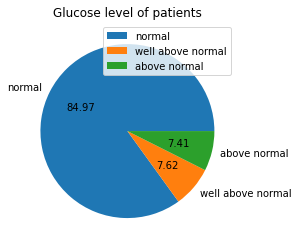

In [12]:
plt.pie(x=data["gluc"].value_counts(),labels=['normal', 'well above normal', 'above normal'],autopct='%.2f')
plt.title('Glucose level of patients')
plt.legend()
plt.show()

84.97% of patients having glucose level in normal.7.41% of patients have above normal level of glucose and 7.62% of patients have well above normal level of glucose

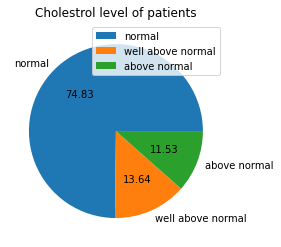

In [13]:
plt.pie(x=data["cholesterol"].value_counts(),labels=['normal', 'well above normal', 'above normal'],autopct='%.2f')
plt.title('Cholestrol level of patients')
plt.legend()
plt.show()

About 74.84% of them have a normal cholestrol value. 11.52% have above normal value of cholestrol and 13.64% patients has well above normal value.



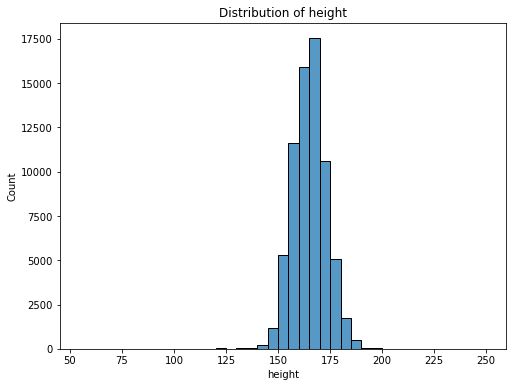

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(data["height"],binwidth=5)
plt.title("Distribution of height")
plt.show()

Most of people height in between 155 to 175.Very few pople having height lessthan 150.

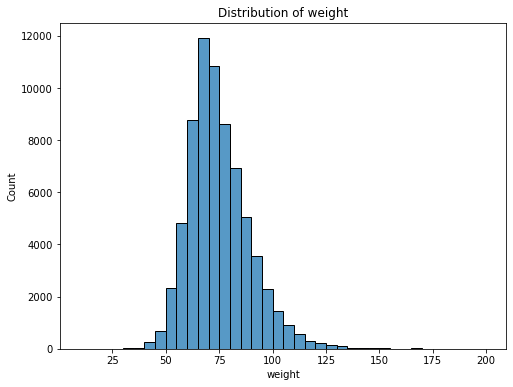

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(data["weight"],binwidth=5)
plt.title("Distribution of weight")
plt.show()

Graph is right skewed.Nearly 40000 people with weight range between 65 to 75

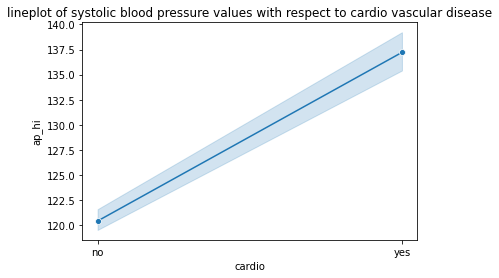

In [16]:
sns.lineplot(x=data['cardio'],y=data['ap_hi'],marker='o')
plt.title('lineplot of systolic blood pressure values with respect to cardio vascular disease')
plt.show()

As the value of ap_hi increases the chances for cardio vascular disease also increases. Both are directly proportional.

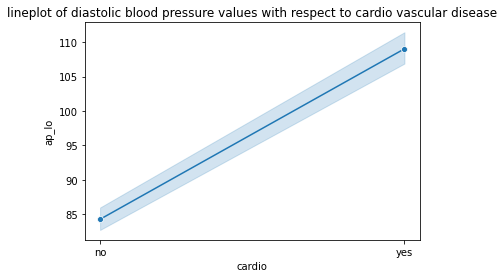

In [17]:
sns.lineplot(x=data['cardio'],y=data['ap_lo'],marker='o')
plt.title('lineplot of diastolic blood pressure values with respect to cardio vascular disease')
plt.show()

As the value of ap_lo increases the chances for cardio vascular disease also increases. Both are directly proportional.

In [18]:
#age is given in number of days.So we want to change into year
#data["age"]=np.round(data["age"]/365)
data['age']=np.round(data['age']/365)

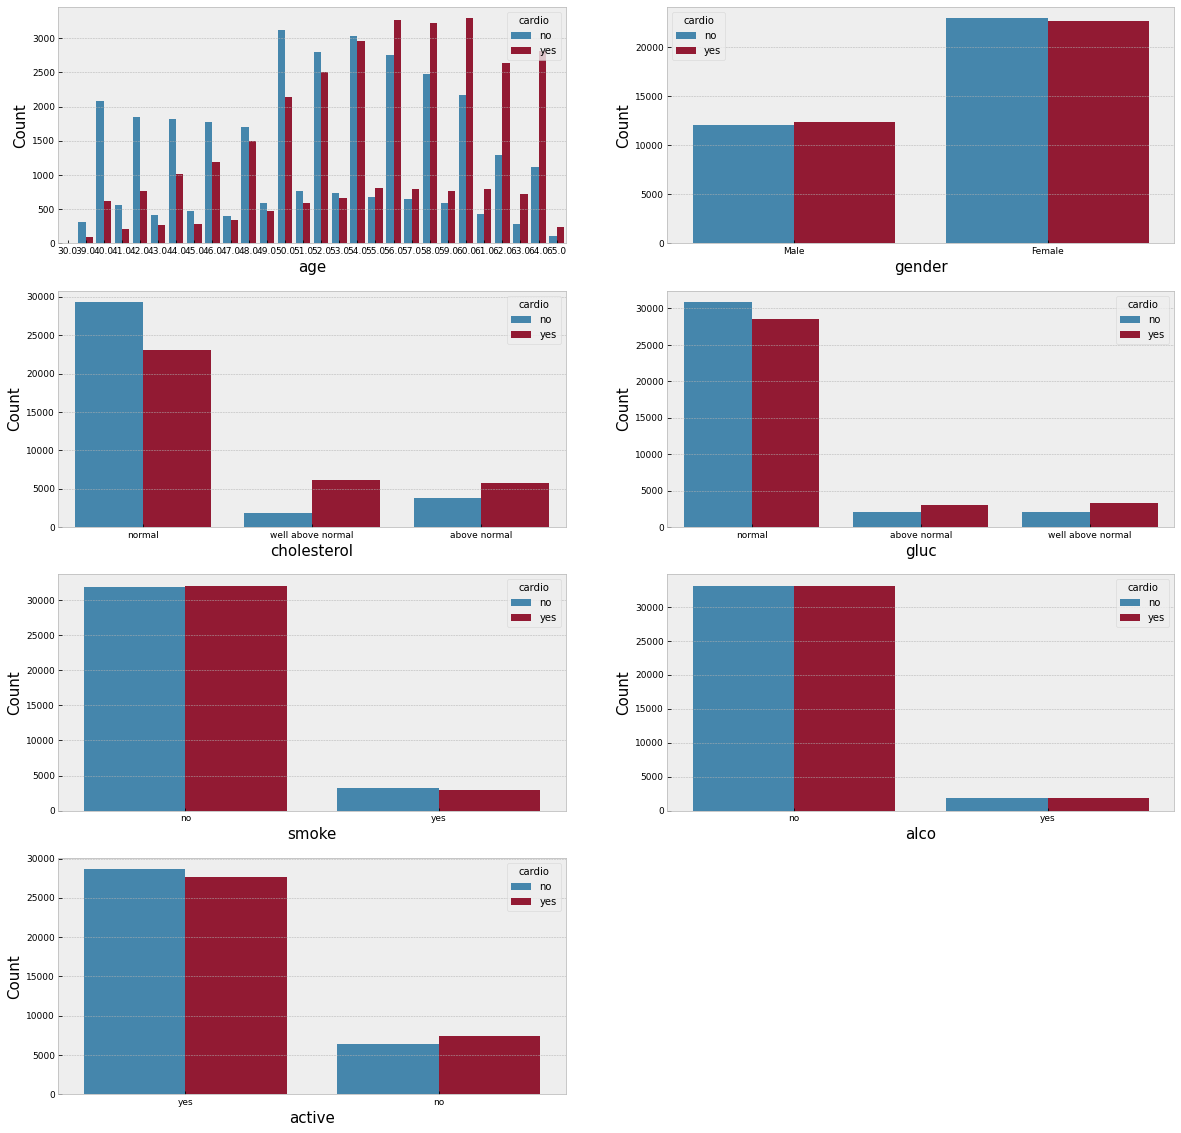

In [19]:
#setting the required plot style
plt.style.use('bmh')
#Defining a function graph()
def graph(x):
    sns.countplot(x = x,hue= 'cardio', data = data )
    #adding labels for x and y axis
    plt.xlabel(x, fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
plt.figure(figsize=(20,20))
#plotting subplots using the function graph()
plt.subplot(421)
graph('age')
plt.subplot(422)
graph('gender')
plt.subplot(423)
graph('cholesterol')
plt.subplot(424)
graph('gluc')
plt.subplot(425)
graph('smoke')
plt.subplot(426)
graph('alco')
plt.subplot(427)
graph('active')
plt.show();

> As age increases the chance of getting cardio disease increases

> Chances of getting cardio disease increases with rise in cholesterol level

> Persons with Glucose level greater than normal are more likely to get cardio disease

> Consumption of alcohol and smoking habit has less effect as its similar to those who don't have these habits.

> Active people can also have a chance of cardio disease

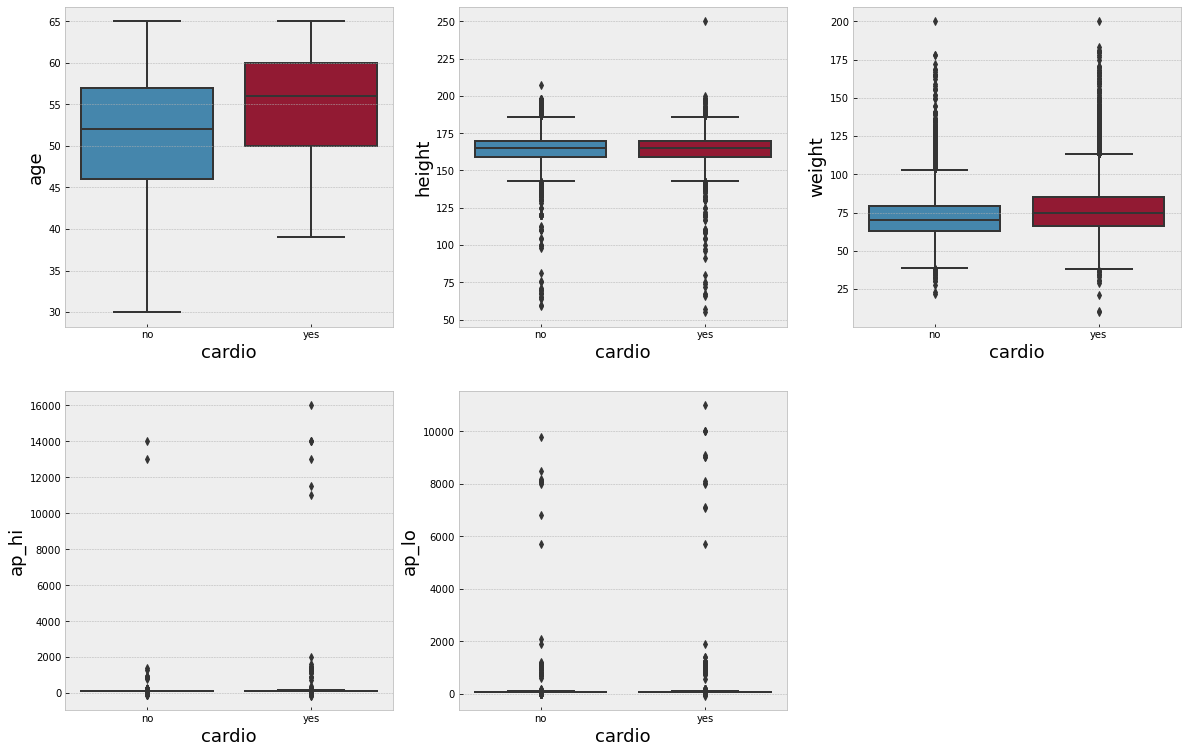

In [20]:
#setting the required plot style
plt.style.use('bmh')
#Defining a function graph()
def graph(y):
    sns.boxplot(x = 'cardio', y = y , data = data)
    plt.xlabel('cardio', fontsize = 18)
    plt.ylabel( y, fontsize = 18)
plt.figure(figsize=(20,20))
#plotting subplots using the function graph()
plt.subplot(331)
graph('age')
plt.subplot(332)
graph('height')
plt.subplot(333)
graph('weight')
plt.subplot(334)
graph('ap_hi')
plt.subplot(335)
graph('ap_lo')
plt.show();


> Cardio disease is common for people having:
    
• Age 50-60 years

• Weight 70-80kg

• Systolic pressure 120-200 mmHg

• Diastolic pressure 80-120 mmHg

• Outliers need to be handled

# Data Cleaning

In [21]:
#Missing Values

In [22]:
#Checking for null values
data.isna().sum()

id              0
age             0
gender          8
height         59
weight          0
ap_hi           0
ap_lo           0
cholesterol    15
gluc            0
smoke           0
alco           13
active          0
cardio          0
dtype: int64

In [23]:
data.dtypes

id               int64
age            float64
gender          object
height         float64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol     object
gluc            object
smoke           object
alco            object
active          object
cardio          object
dtype: object

In [24]:
#Since the alco and chlesterol are categorical values,null values can be filled with mode.

In [25]:
cols=['alco','cholesterol','gender']
for i in cols:
    data[i]=data[i].fillna(data[i].mode()[0])
    

In [26]:
#plotting of missing values of height

<function matplotlib.pyplot.show(close=None, block=None)>

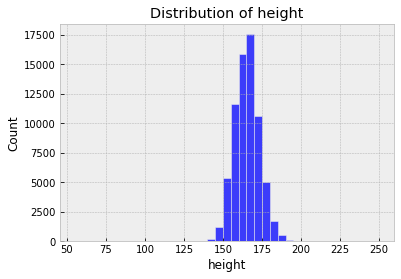

In [27]:
sns.histplot(data['height'],binwidth=5)
plt.title('Distribution of height')
plt.show

In [28]:
#Since the data distribution is normal,we can fill the missing values of height with mean

In [29]:
data['height']=data['height'].fillna(data['height'].mean())

In [30]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [31]:
#finding unique values
data.nunique()

id             70000
age               28
gender             2
height           110
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [32]:
#Dropping of 'id' column

In [33]:
data.drop('id',axis=1,inplace=True)

In [34]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,Male,168.0,62.0,110,80,normal,normal,no,no,yes,no
1,55.0,Female,156.0,85.0,140,90,well above normal,normal,no,no,yes,yes
2,52.0,Female,165.0,64.0,130,70,well above normal,normal,no,no,no,yes
3,48.0,Male,169.0,82.0,150,100,normal,normal,no,no,yes,yes
4,48.0,Female,156.0,56.0,100,60,normal,normal,no,no,no,no


In [35]:
#sorting categorical values
categorical_features = data.select_dtypes(include=[np.object])
categorical_features.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio
0,Male,normal,normal,no,no,yes,no
1,Female,well above normal,normal,no,no,yes,yes
2,Female,well above normal,normal,no,no,no,yes
3,Male,normal,normal,no,no,yes,yes
4,Female,normal,normal,no,no,no,no


In [36]:
#sorting numerical values
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head()

,age,height,weight,ap_hi,ap_lo
0,50.0,168.0,62.0,110,80
1,55.0,156.0,85.0,140,90
2,52.0,165.0,64.0,130,70
3,48.0,169.0,82.0,150,100
4,48.0,156.0,56.0,100,60


In [37]:
numerical_features.columns

Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo'], dtype='object')

#### Outlier detection

#### age

In [38]:
#Managing Outliers
Q1 = np.percentile(data['age'],25,interpolation='midpoint')
Q2 = np.percentile(data['age'],50,interpolation='midpoint')
Q3 = np.percentile(data['age'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)

33.0
73.0


In [39]:
outlier = []
for x in data ['age']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)
outlier

[30.0, 30.0, 30.0, 30.0]

#### height

In [40]:
#Managing Outliers
Q1 = np.percentile(data['height'],25,interpolation='midpoint')
Q2 = np.percentile(data['height'],50,interpolation='midpoint')
Q3 = np.percentile(data['height'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)

142.5
186.5


In [41]:
outlier = []
for x in data ['height']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)
outlier
len(outlier)

519

In [42]:
data[data['height'] < 125]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
224,60.0,Male,76.0,55.0,120,80,normal,normal,no,no,yes,no
3420,40.0,Female,100.0,70.0,100,70,normal,normal,no,no,yes,no
3735,48.0,Female,120.0,70.0,120,70,normal,normal,no,no,yes,no
3752,42.0,Female,120.0,30.0,110,70,normal,normal,no,no,yes,no
4212,44.0,Female,120.0,80.0,120,80,normal,normal,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...
65302,51.0,Female,99.0,60.0,90,60,normal,normal,no,no,yes,no
66023,40.0,Female,120.0,80.0,120,70,above normal,normal,no,no,yes,no
66479,46.0,Male,110.0,90.0,110,90,normal,normal,no,no,yes,no
66643,52.0,Female,57.0,61.0,130,90,normal,normal,no,no,yes,yes


In [43]:
data=data[data['height']>= 125]

In [44]:
data[data['height'] > 200]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6486,58.0,Female,250.0,86.0,140,100,well above normal,normal,no,no,yes,yes
21628,52.0,Male,207.0,78.0,100,70,normal,normal,no,yes,yes,no


In [45]:
data.drop(index=9223,axis=1,inplace=True)

#### weight

In [46]:
#Managing Outliers
Q1 = np.percentile(data['weight'],25,interpolation='midpoint')
Q2 = np.percentile(data['weight'],50,interpolation='midpoint')
Q3 = np.percentile(data['weight'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)

39.5
107.5


In [47]:
outlier = []
for x in data ['weight']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)
outlier
len(outlier)

1810

In [48]:
data=data[data['weight']> 40]

#### ap_hi

In [49]:
#Managing Outliers
Q1 = np.percentile(data['ap_hi'],25,interpolation='midpoint')
Q2 = np.percentile(data['ap_hi'],50,interpolation='midpoint')
Q3 = np.percentile(data['ap_hi'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)

90.0
170.0


In [50]:
outlier = []
for x in data ['ap_hi']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)
outlier
len(outlier)

1429

#### ap_lo

In [51]:
#Managing Outliers
Q1 = np.percentile(data['ap_lo'],25,interpolation='midpoint')
Q2 = np.percentile(data['ap_lo'],50,interpolation='midpoint')
Q3 = np.percentile(data['ap_lo'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)

65.0
105.0


In [52]:
outlier = []
for x in data ['ap_lo']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)
outlier
len(outlier)

4601

In [53]:
## systolic pressure below 90 mmHg and above 180mmHg needs medical intervention
critical_aphi = (data.ap_hi <70) | (data.ap_hi > 200)
data[critical_aphi].ap_hi.count() / data.ap_hi.count()

0.004110628911900772

In [54]:
#dropping 0.4% data
data.drop(data[critical_aphi].index, inplace=True)

In [55]:
## diastolic pressure below 60mmHg ang above 110mmHg is dangerous
critical_aplo = (data.ap_lo <40) | (data.ap_lo > 130)
data[critical_aplo].ap_lo.count() / data.ap_lo.count()

0.014913996433296899

In [56]:
#dropping 1.49% data
data.drop(data[critical_aplo].index, inplace=True)

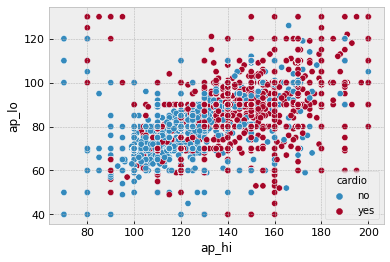

In [57]:
#plotting api_hi and api_lo
plt.style.use('bmh')
sns.scatterplot(x = 'ap_hi', y = 'ap_lo' , hue= 'cardio' , data = data,  s=40)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

### BMI analysis

In [58]:
data_bmi = data.copy()

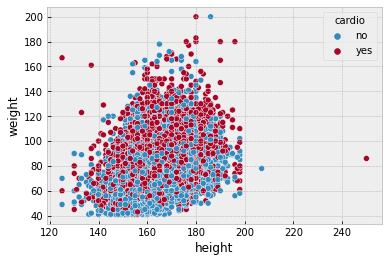

In [59]:
sns.scatterplot(x ='height', y ='weight', hue = 'cardio', data= data_bmi);

In [60]:
#create bmi feature
def BMI(data):
    return round(data['weight'] / (data ['height'] /100)**2,2)
data_bmi['BMI'] = data_bmi.apply(BMI, axis=1)

In [61]:
data_bmi.describe().T

,count,mean,std,min,25%,50%,75%,max
age,68495.0,53.326374,6.766855,30.00,48.00,54.00,58.00,65.00
height,68495.0,164.450491,7.843091,125.00,159.00,165.00,170.00,250.00
weight,68495.0,74.145813,14.235572,41.00,65.00,72.00,82.00,200.00
ap_hi,68495.0,126.567633,16.522300,70.00,120.00,120.00,140.00,200.00
ap_lo,68495.0,81.311176,9.403733,40.00,80.00,80.00,90.00,130.00
BMI,68495.0,27.453443,5.201163,13.76,23.88,26.35,30.12,106.88


### Minmax Scaler

In [62]:
data_num = data.select_dtypes(include=[np.number])
data_num.columns

Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo'], dtype='object')

### Encoding

In [63]:
categorical_features.columns

Index(['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'], dtype='object')

In [64]:
#apply label encoding
from sklearn.preprocessing import LabelEncoder
columns =['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
label_encoder = LabelEncoder()
for i in columns:
    data[i]=label_encoder.fit_transform(data[i])
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,1,168.0,62.0,110,80,1,1,0,0,1,0
1,55.0,0,156.0,85.0,140,90,2,1,0,0,1,1
2,52.0,0,165.0,64.0,130,70,2,1,0,0,0,1
3,48.0,1,169.0,82.0,150,100,1,1,0,0,1,1
4,48.0,0,156.0,56.0,100,60,1,1,0,0,0,0


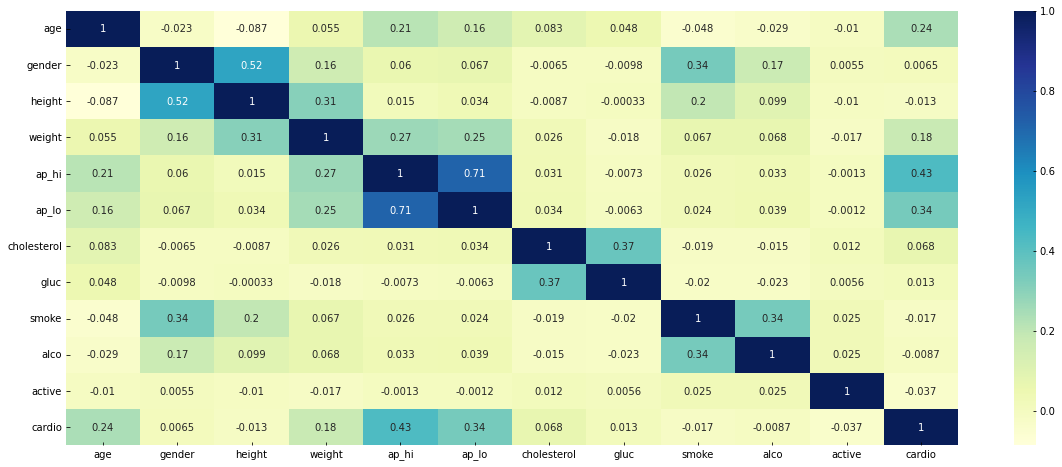

In [65]:
#plot correlation matrix
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu');

In [66]:
data.dtypes

age            float64
gender           int32
height         float64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int32
gluc             int32
smoke            int32
alco             int32
active           int32
cardio           int32
dtype: object

In [67]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [68]:
#converting to dataframe
data_cat = data.drop(data_num,axis=1)
data_cat = pd.DataFrame(data_cat)

In [69]:
data_cat.columns

Index(['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'], dtype='object')

In [70]:
data_num.columns

Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo'], dtype='object')

In [71]:
#concat numerical and categorical columns
data = pd.concat([data_num,data_cat],axis=1)
data.head()

,age,height,weight,ap_hi,ap_lo,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,168.0,62.0,110,80,1,1,1,0,0,1,0
1,55.0,156.0,85.0,140,90,0,2,1,0,0,1,1
2,52.0,165.0,64.0,130,70,0,2,1,0,0,0,1
3,48.0,169.0,82.0,150,100,1,1,1,0,0,1,1
4,48.0,156.0,56.0,100,60,0,1,1,0,0,0,0


In [72]:
data.isna().sum()

age            0
height         0
weight         0
ap_hi          0
ap_lo          0
gender         0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [73]:
data=data.drop(['ap_hi','active'],axis=1)

Logistic Regression

Model 1


In [74]:
X=data.drop('cardio',axis=1)
Y=data['cardio']

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
clf=LogisticRegression()
clf_model1=clf.fit(X_train,Y_train)
prediction1=clf_model1.predict(X_test)

In [78]:
prediction1

array([0, 0, 1, ..., 0, 0, 1])

In [79]:
prediction1=pd.DataFrame(prediction1)

In [80]:
prediction1.value_counts(normalize=True)

0    0.519162
1    0.480838
dtype: float64

Confusion Matrix

In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
confusion_matrix(Y_test,prediction1)

array([[4722, 2157],
       [2390, 4430]], dtype=int64)

In [83]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [84]:
precision_score(Y_test,prediction1)

0.6725368149385152

In [85]:
accuracy_score(Y_test,prediction1)

0.6680779618950289

In [86]:
recall_score(Y_test,prediction1)

0.6495601173020528

Model 2

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
min_max_scaler=MinMaxScaler(feature_range=(0,1))
X=min_max_scaler.fit_transform(X)

In [89]:
data.columns

Index(['age', 'height', 'weight', 'ap_lo', 'gender', 'cholesterol', 'gluc',
       'smoke', 'alco', 'cardio'],
      dtype='object')

In [90]:
X=pd.DataFrame(X,columns=['age', 'gender', 'height', 'weight', 'ap_lo', 'cholesterol', 'gluc','smoke', 'alco'])

In [91]:
X.describe()

,age,gender,height,weight,ap_lo,cholesterol,gluc,smoke,alco
count,68495.000000,68495.000000,68495.000000,68495.000000,68495.000000,68495.000000,68495.000000,68495.000000,68495.000000
mean,0.666468,0.315604,0.208464,0.459013,0.348858,0.489656,0.501175,0.088036,0.053522
std,0.193339,0.062745,0.089532,0.104486,0.476612,0.249753,0.193466,0.283349,0.225074
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.514286,0.272000,0.150943,0.444444,0.000000,0.500000,0.500000,0.000000,0.000000
50%,0.685714,0.320000,0.194969,0.444444,0.000000,0.500000,0.500000,0.000000,0.000000
75%,0.800000,0.360000,0.257862,0.555556,1.000000,0.500000,0.500000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
clf=LogisticRegression()
clf_model2=clf.fit(X_train,Y_train)
prediction2=clf_model2.predict(X_test)

In [93]:
confusion_matrix(Y_test,prediction2)

array([[4722, 2157],
       [2390, 4430]], dtype=int64)

In [94]:
precision_score(Y_test,prediction2)

0.6725368149385152

In [95]:
accuracy_score(Y_test,prediction2)

0.6680779618950289

In [96]:
recall_score(Y_test,prediction2)

0.6495601173020528

MODEL 3 

Standard Scaler

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
std_scaler=StandardScaler()

In [99]:
X=data.drop('cardio',axis=1)
Y=data['cardio']

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [101]:
X=std_scaler.fit_transform(X)

In [102]:
X=pd.DataFrame(X,columns=['age', 'gender', 'height', 'weight', 'ap_lo', 'cholesterol', 'gluc','smoke', 'alco'])

In [103]:
X.describe()

,age,gender,height,weight,ap_lo,cholesterol,gluc,smoke,alco
count,6.849500e+04,6.849500e+04,6.849500e+04,6.849500e+04,6.849500e+04,6.849500e+04,6.849500e+04,6.849500e+04,6.849500e+04
mean,7.787527e-16,2.942974e-15,-2.298694e-16,6.892832e-16,8.430531e-17,-1.243829e-15,-2.538953e-16,2.264056e-15,1.205571e-16
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-3.447176e+00,-5.030004e+00,-2.328396e+00,-4.393093e+00,-7.319579e-01,-1.960576e+00,-2.590534e+00,-3.106993e-01,-2.377998e-01
25%,-7.871327e-01,-6.949469e-01,-6.424666e-01,-1.394325e-01,-7.319579e-01,4.141650e-02,-6.074865e-03,-3.106993e-01,-2.377998e-01
50%,9.954856e-02,7.006327e-02,-1.507371e-01,-1.394325e-01,-7.319579e-01,4.141650e-02,-6.074865e-03,-3.106993e-01,-2.377998e-01
75%,6.906694e-01,7.075717e-01,5.517337e-01,9.239828e-01,1.366199e+00,4.141650e-02,-6.074865e-03,-3.106993e-01,-2.377998e-01
max,1.725131e+00,1.090771e+01,8.840889e+00,5.177644e+00,1.366199e+00,2.043409e+00,2.578384e+00,3.218546e+00,4.205217e+00


In [104]:
clf=LogisticRegression()
clf_model3=clf.fit(X_train,Y_train)
prediction3=clf_model3.predict(X_test)

In [105]:
confusion_matrix(Y_test,prediction3)

array([[4722, 2157],
       [2390, 4430]], dtype=int64)

In [106]:
precision_score(Y_test,prediction3)

0.6725368149385152

In [107]:
accuracy_score(Y_test,prediction3)

0.6680779618950289

In [108]:
recall_score(Y_test,prediction3)

0.6495601173020528

Model 4

In [109]:
X=data.drop('cardio',axis=1)
Y=data['cardio']

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

In [111]:
clf=LogisticRegression()
clf_model4=clf.fit(X_train,Y_train)
prediction4=clf_model4.predict(X_test)

In [112]:
confusion_matrix(Y_test,prediction4)

array([[3556, 1594],
       [1773, 3352]], dtype=int64)

In [113]:
precision_score(Y_test,prediction4)

0.677719369187222

In [114]:
accuracy_score(Y_test,prediction4)

0.6723114355231143

In [115]:
recall_score(Y_test,prediction4)

0.6540487804878049

Model 5

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=42)

In [117]:
clf=LogisticRegression()
clf_model5=clf.fit(X_train,Y_train)
prediction5=clf_model5.predict(X_test)

In [118]:
confusion_matrix(Y_test,prediction5)

array([[2345, 1050],
       [1178, 2277]], dtype=int64)

In [119]:
precision_score(Y_test,prediction5)

0.6844003606853021

In [120]:
accuracy_score(Y_test,prediction5)

0.6747445255474452

In [121]:
recall_score(Y_test,prediction5)

0.6590448625180897

Model 6

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.01,random_state=42)

In [123]:
clf=LogisticRegression()
clf_model6=clf.fit(X_train,Y_train)
prediction6=clf_model6.predict(X_test)

In [124]:
prediction6

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [125]:
prediction6=pd.DataFrame(prediction6)

In [126]:
prediction6.value_counts(normalize=True)

0    0.50073
1    0.49927
dtype: float64

In [127]:
confusion_matrix(Y_test,prediction6)

array([[240,  89],
       [103, 253]], dtype=int64)

In [128]:
precision_score(Y_test,prediction6)

0.7397660818713451

In [129]:
accuracy_score(Y_test,prediction6)

0.7197080291970803

In [130]:
recall_score(Y_test,prediction6)

0.7106741573033708

Model7

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=24)

In [132]:
clf=LogisticRegression()
clf_model7=clf.fit(X_train,Y_train)
prediction7=clf_model7.predict(X_test)

In [133]:
confusion_matrix(Y_test,prediction7)

array([[2376, 1074],
       [1184, 2216]], dtype=int64)